ValueError: The rows of 'x' must be equal

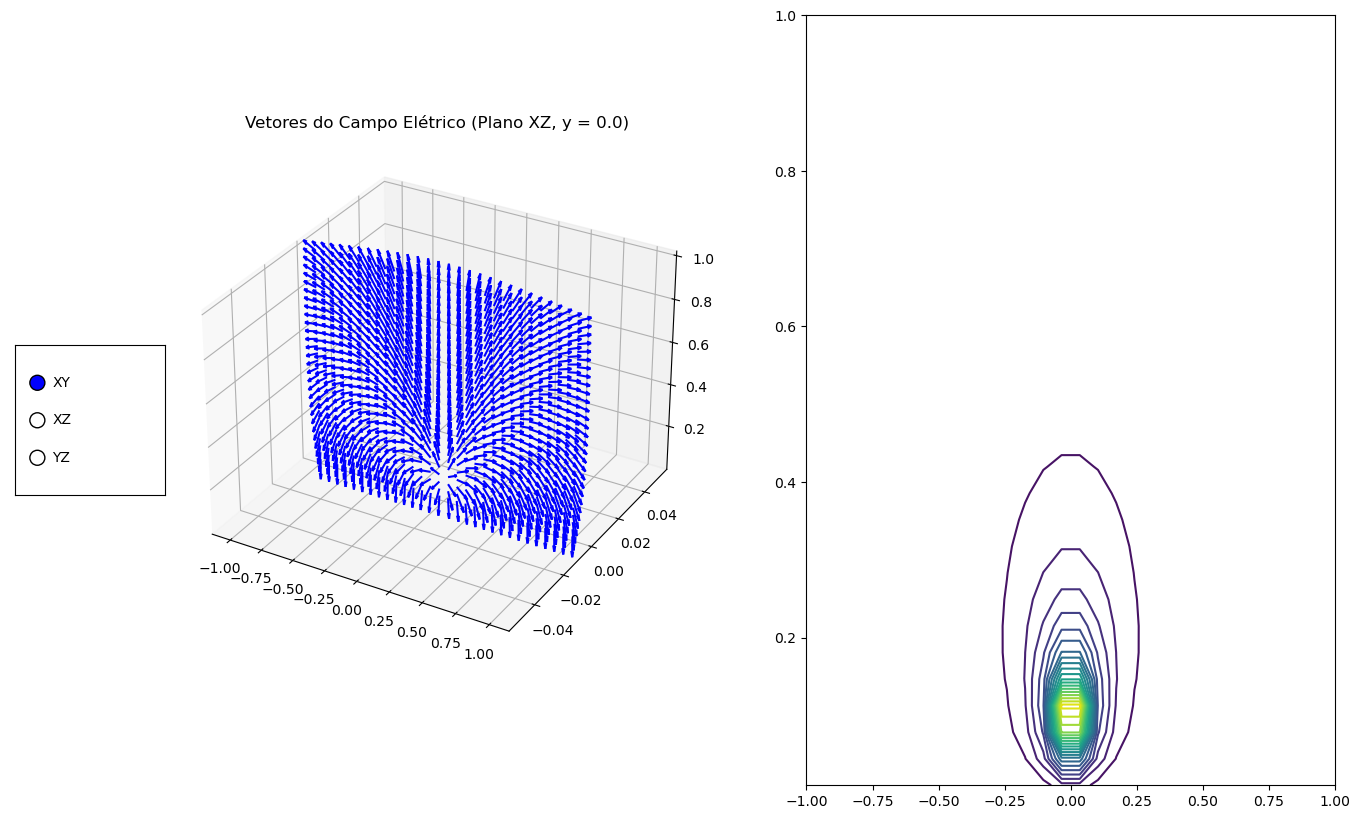

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
from matplotlib.patches import Circle

# Parâmetros do dipolo
q = 1e-9  # Carga (C)
d = 0.2   # Distância entre as cargas (m)
k = 8.99e9  # Constante eletrostática (N·m²/C²)

# Criação da malha 3D
x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
z = np.linspace(0.01, 1, 30)  # Evita divisão por zero
X, Y, Z = np.meshgrid(x, y, z)

# Posições das cargas
pos_q = np.array([0, 0, d/2])
neg_q = np.array([0, 0, -d/2])

# Potencial elétrico
def potential(x, y, z):
    r_pos = np.sqrt(x**2 + y**2 + (z - d/2)**2)
    r_neg = np.sqrt(x**2 + y**2 + (z + d/2)**2)
    return k * q * (1/r_pos - 1/r_neg)

# Campo elétrico (calculado numericamente)
h = 1e-6
Ex = -(potential(X + h, Y, Z) - potential(X - h, Y, Z)) / (2*h)
Ey = -(potential(X, Y + h, Z) - potential(X, Y - h, Z)) / (2*h)
Ez = -(potential(X, Y, Z + h) - potential(X, Y, Z - h)) / (2*h)

# Normalização
E_norm = np.sqrt(Ex**2 + Ey**2 + Ez**2)
Ex, Ey, Ez = Ex/E_norm, Ey/E_norm, Ez/E_norm

# Configuração da figura
fig = plt.figure(figsize=(15, 10))
ax_3d = fig.add_subplot(121, projection='3d')
ax_2d = fig.add_subplot(122)

# Função para atualizar a visualização
def update_plot(plane):
    ax_3d.clear()
    ax_2d.clear()
    
    if plane == 'XY':
        z_slice = 0.5
        idx = np.argmin(np.abs(z - z_slice))
        
        # Plot 3D
        ax_3d.quiver(X[:, :, idx], Y[:, :, idx], np.full_like(X[:, :, idx], z_slice),
                    Ex[:, :, idx], Ey[:, :, idx], np.zeros_like(Ex[:, :, idx]),
                    length=0.1, color='r')
        ax_3d.set_title(f'Vetores do Campo Elétrico (Plano XY, z = {z_slice})')
        
        # Plot 2D com isolinhas
        phi = potential(X[:, :, idx], Y[:, :, idx], z_slice)
        contour = ax_2d.contour(X[:, :, idx], Y[:, :, idx], phi, levels=20, cmap='viridis')
        ax_2d.streamplot(X[:, :, idx], Y[:, :, idx], Ex[:, :, idx], Ey[:, :, idx], 
                        color='k', density=1.5, arrowstyle='->')
        ax_2d.set_title(f'Isolinhas e Linhas de Campo (Plano XY, z = {z_slice})')
        
    elif plane == 'XZ':
        y_slice = 0.0
        idx = np.argmin(np.abs(y - y_slice))
        
        # Plot 3D
        ax_3d.quiver(X[idx, :, :], np.full_like(Y[idx, :, :], y_slice), Z[idx, :, :],
                    Ex[idx, :, :], np.zeros_like(Ey[idx, :, :]), Ez[idx, :, :],
                    length=0.1, color='b')
        ax_3d.set_title(f'Vetores do Campo Elétrico (Plano XZ, y = {y_slice})')
        
        # Plot 2D com isolinhas
        phi = potential(X[idx, :, :], y_slice, Z[idx, :, :])
        contour = ax_2d.contour(X[idx, :, :], Z[idx, :, :], phi, levels=20, cmap='viridis')
        ax_2d.streamplot(X[idx, :, :], Z[idx, :, :], Ex[idx, :, :], Ez[idx, :, :],
                        color='k', density=1.5, arrowstyle='->')
        ax_2d.set_title(f'Isolinhas e Linhas de Campo (Plano XZ, y = {y_slice})')
        
    elif plane == 'YZ':
        x_slice = 0.0
        idx = np.argmin(np.abs(x - x_slice))
        
        # Plot 3D
        ax_3d.quiver(np.full_like(X[:, idx, :], x_slice), Y[:, idx, :], Z[:, idx, :],
                    np.zeros_like(Ex[:, idx, :]), Ey[:, idx, :], Ez[:, idx, :],
                    length=0.1, color='g')
        ax_3d.set_title(f'Vetores do Campo Elétrico (Plano YZ, x = {x_slice})')
        
        # Plot 2D com isolinhas
        phi = potential(x_slice, Y[:, idx, :], Z[:, idx, :])
        contour = ax_2d.contour(Y[:, idx, :], Z[:, idx, :], phi, levels=20, cmap='viridis')
        ax_2d.streamplot(Y[:, idx, :], Z[:, idx, :], Ey[:, idx, :], Ez[:, idx, :],
                        color='k', density=1.5, arrowstyle='->')
        ax_2d.set_title(f'Isolinhas e Linhas de Campo (Plano YZ, x = {x_slice})')
    
    # Configurações comuns
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.set_xlim(-1, 1)
    ax_3d.set_ylim(-1, 1)
    ax_3d.set_zlim(0, 1)
    
    ax_2d.set_aspect('equal')
    ax_2d.set_xlabel('X' if plane != 'YZ' else 'Y')
    ax_2d.set_ylabel('Z' if plane != 'XY' else 'Y')
    ax_2d.grid(True)
    plt.colorbar(contour, ax=ax_2d, label='Potencial Elétrico (V)')
    
    # Adiciona marcadores das cargas nos plots 2D
    if plane == 'XZ':
        ax_2d.scatter(0, d/2, color='red', s=100, label='+q')
        ax_2d.scatter(0, -d/2, color='blue', s=100, label='-q')
    elif plane == 'YZ':
        ax_2d.scatter(0, d/2, color='red', s=100, label='+q')
        ax_2d.scatter(0, -d/2, color='blue', s=100, label='-q')
    
    ax_2d.legend()
    plt.tight_layout()
    plt.draw()

# Botões de rádio
rax = plt.axes([0.02, 0.4, 0.1, 0.15])
radio = RadioButtons(rax, ('XY', 'XZ', 'YZ'))
radio.on_clicked(update_plot)

# Visualização inicial
update_plot('XZ')
plt.show()